In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import datetime
import math

In [2]:
#Production data input from La Cabrita
ins_cap= 90
df_prod= pd.read_excel('ES_COLOC_Model_input.xlsx', sheet_name = 'La Cabrita Data')

In [3]:
#Input of Kpler Power Curves (2 Scenarios)
df_price_high = pd.read_excel('ES_COLOC_Model_input.xlsx', sheet_name= 'DA_High')
df_price_cc   = pd.read_excel('ES_COLOC_Model_input.xlsx', sheet_name= 'DA_Central & Crash')

In [4]:
#Input battery Assumptions

batt_cap = 70
batt_dur = 2
batt_cyc = 1
powerprice_selector = "High Case"
batt_lifetime = 15
round_eff = 0.85
grid_factor = 0.9                                                      #grid factor to be adjusted based on discussions, to be used for discharge module
soc_max = batt_cap * batt_dur
Grid_cap = ins_cap * grid_factor

In [5]:
#Declaring some variables that are used throughout the code

d1 = datetime.date(2026,6,1)
d2 = datetime.date(2041,6,30)
alldates = pd.date_range(d1, d2).astype('datetime64[ns]')
alldates = alldates[~ ((alldates.month == 2) & (alldates.day == 29))]              # To remove leap days to match with dataset
ref_date = alldates[0]
end_date = alldates[-1]
num_days=len(alldates)
num_hours = num_days * 24

In [6]:
#Merging production with power price data
df_price_high.index == df_prod.index
df_price_high['Production (MWh)'] = df_prod['Production (MWh)'] * (90/50)
df_price_cc['Production (MWh)'] = df_prod['Production (MWh)'] * (90/50)

In [7]:
#Adding Case Selector for Power Prices

if powerprice_selector == 'High Case':
    df_price_used = df_price_high
else: 
    df_price_used = df_price_cc

In [8]:
df_price_used.loc[df_price_used['Day'] == 881]

,S.No,Date,Hour,Day,Price,Year,Hour 24,Day 365,Month Num,Month 12,Production (MWh)
21120,21121,2026-05-31,3601,881,120.52,2026,2,151,29,5,0.000000
21121,21122,2026-05-31,3602,881,113.71,2026,3,151,29,5,0.000000
21122,21123,2026-05-31,3603,881,106.35,2026,4,151,29,5,0.000000
21123,21124,2026-05-31,3604,881,95.69,2026,5,151,29,5,0.000000
21124,21125,2026-05-31,3605,881,94.36,2026,6,151,29,5,0.000000
21125,21126,2026-05-31,3606,881,95.16,2026,7,151,29,5,0.000000
21126,21127,2026-05-31,3607,881,91.06,2026,8,151,29,5,1.796323
21127,21128,2026-05-31,3608,881,99.62,2026,9,151,29,5,10.439011
21128,21129,2026-05-31,3609,881,117.94,2026,10,151,29,5,28.234563
21129,21130,2026-05-31,3610,881,31.25,2026,11,151,29,5,45.432531


In [9]:
df_price_used = df_price_used.iloc[21144:].sort_values('S.No').reset_index(drop = True)
df_price_used

,S.No,Date,Hour,Day,Price,Year,Hour 24,Day 365,Month Num,Month 12,Production (MWh)
0,21145,2026-06-01,3625,882,99.67,2026,2,152,30,6,0.0
1,21146,2026-06-01,3626,882,92.07,2026,3,152,30,6,0.0
2,21147,2026-06-01,3627,882,89.01,2026,4,152,30,6,0.0
3,21148,2026-06-01,3628,882,80.04,2026,5,152,30,6,0.0
4,21149,2026-06-01,3629,882,71.91,2026,6,152,30,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
259171,280316,2055-12-31,8756,11680,138.00,2055,20,365,384,12,0.0
259172,280317,2055-12-31,8757,11680,154.41,2055,21,365,384,12,0.0
259173,280318,2055-12-31,8758,11680,148.16,2055,22,365,384,12,0.0
259174,280319,2055-12-31,8759,11680,146.32,2055,23,365,384,12,0.0


In [10]:
#Charging Module
k = 1  #k is day counter
l = 882  #Alternate day counter, without this the df_price_short dataframe does not work
df_res_price = pd.DataFrame(np.zeros((num_days, 11)), columns = ['Charge Price_wt', 'Discharge Price_wt', 'SOC Charged' ,'Disc Volume' ,'Max Hour','Day', 'Year', 'Max Hour 24', 'Check', 'Month', 'Month 12'])

for k in range(num_days):
    
    df_price_short = df_price_used.loc[df_price_used['Day'] == l].copy()

# Sorting values by lowest price while also being charge eligible

    df_price_short_sort = df_price_short.loc[df_price_short['Production (MWh)'] > 0].sort_values("Price")
    imax = len(df_price_short_sort)
    
# Initializing the df to zeros in every loop to be able to rewrite
    
    df_soc_mod = pd.DataFrame(np.zeros((18, 4)), columns = ['SOC', 'Price', 'Hour', 'Hour 24'])
    i = 0
    
# SOC calculation Module
   
    while i< imax:
        df_soc_mod['SOC'].iloc[i] = df_price_short_sort['Production (MWh)'].iloc[i]
        df_soc_mod['Price'].iloc[i] = df_price_short_sort['Price'].iloc[i]
        df_soc_mod['Hour'].iloc[i] = df_price_short_sort['Hour'].iloc[i]
        df_soc_mod['Hour 24'].iloc[i] = df_price_short_sort['Hour 24'].iloc[i]
        if df_soc_mod['SOC'].sum() > soc_max:
            df_soc_mod['SOC'].iloc[i] = soc_max - df_soc_mod['SOC'].sum() + df_price_short_sort['Production (MWh)'].iloc[i]
            break  
        i+=1    
        
# Assigning the Results to a Variable
   
    df_res_price['Charge Price_wt'].iloc[k-1] = sum(df_soc_mod['SOC'] * df_soc_mod['Price']) / df_soc_mod['SOC'].sum()
    df_res_price['SOC Charged'].iloc[k-1] = sum(df_soc_mod['SOC'])
    df_res_price['Max Hour'].iloc[k-1] = df_soc_mod['Hour'].max()
    df_res_price['Max Hour 24'].iloc[k-1] = df_soc_mod['Hour 24'].max()
    df_res_price['Day'].iloc[k-1] = df_price_short_sort['Day'].min()
    df_res_price['Year'].iloc[k-1] = df_price_short_sort['Year'].iloc[0]
    df_res_price['Month'].iloc[k-1] = df_price_short_sort['Month Num'].min()
    df_res_price['Month 12'].iloc[k-1] = df_price_short_sort['Month 12'].min()
    
# Readjusting Day Counters 
    
    k+=1
    l+=1  

# The first row always ends up becoming the last, hence the sort by day function is used to correct it. The values remain unchanged and are still correct. 
    
df_res_price = df_res_price.sort_values('Day').reset_index(drop=True)


In [11]:
df_res_price

,Charge Price_wt,Discharge Price_wt,SOC Charged,Disc Volume,Max Hour,Day,Year,Max Hour 24,Check,Month,Month 12
0,24.227175,0.0,140.0,0.0,3640.0,882.0,2026.0,17.0,0.0,30.0,6.0
1,31.655069,0.0,140.0,0.0,3665.0,883.0,2026.0,18.0,0.0,30.0,6.0
2,25.309146,0.0,140.0,0.0,3691.0,884.0,2026.0,20.0,0.0,30.0,6.0
3,59.037786,0.0,140.0,0.0,3713.0,885.0,2026.0,18.0,0.0,30.0,6.0
4,28.944551,0.0,140.0,0.0,3737.0,886.0,2026.0,18.0,0.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
5500,22.062569,0.0,140.0,0.0,4244.0,6382.0,2041.0,21.0,0.0,210.0,6.0
5501,43.619821,0.0,140.0,0.0,4268.0,6383.0,2041.0,21.0,0.0,210.0,6.0
5502,21.182065,0.0,140.0,0.0,4292.0,6384.0,2041.0,21.0,0.0,210.0,6.0
5503,19.054360,0.0,140.0,0.0,4316.0,6385.0,2041.0,21.0,0.0,210.0,6.0


In [12]:
df_price_used

,S.No,Date,Hour,Day,Price,Year,Hour 24,Day 365,Month Num,Month 12,Production (MWh)
0,21145,2026-06-01,3625,882,99.67,2026,2,152,30,6,0.0
1,21146,2026-06-01,3626,882,92.07,2026,3,152,30,6,0.0
2,21147,2026-06-01,3627,882,89.01,2026,4,152,30,6,0.0
3,21148,2026-06-01,3628,882,80.04,2026,5,152,30,6,0.0
4,21149,2026-06-01,3629,882,71.91,2026,6,152,30,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...
259171,280316,2055-12-31,8756,11680,138.00,2055,20,365,384,12,0.0
259172,280317,2055-12-31,8757,11680,154.41,2055,21,365,384,12,0.0
259173,280318,2055-12-31,8758,11680,148.16,2055,22,365,384,12,0.0
259174,280319,2055-12-31,8759,11680,146.32,2055,23,365,384,12,0.0


In [13]:
# Discharge Module

m = 1 #Day Counter
r = 1
n = 882 # Second Day Counter

#Assinging a different results variable inorder to avoid any errors or mismatch in results

df_res_price_d = pd.DataFrame(np.zeros((num_days, 5)), columns = ['Discharge Price_wt', 'Disc Volume' ,'End SOC', 'Day', 'Year'])

for m in range(num_days):
    
    z = n+1
    
    df_price_short_d1 = df_price_used.loc[df_price_used['Day'] == n].copy()
    df_price_short_sort_d1 = df_price_short_d1.loc[df_price_short_d1['Hour'] > df_res_price['Max Hour'].iloc[n-882]]
    
    
    df_price_short_d2 = df_price_used.loc[df_price_used['Day'] == z].copy()
    df_price_short_sort_d2 = df_price_short_d2.loc[df_price_short_d2['S.No'] < n*24+5]
    
    df_price_short_d = pd.concat([df_price_short_sort_d1 , df_price_short_sort_d2])
    
    #Sorting Values by the Highest Price Hour that occur after the charging is finished
    
    df_price_short_sort_d = df_price_short_d.sort_values(by = ['Price'], ascending = [False])
    jmax = len(df_price_short_sort_d)
    
    #Initializing the soc control variable to zero
    df_soc_mod_d = pd.DataFrame(np.zeros((20, 3)), columns = ['SOC_avail', 'SOC_disc', 'Price'])
    j = 0
    
    #SOC Calculation Module
    df_soc_mod_d['SOC_avail'].iloc[j] = df_res_price['SOC Charged'].iloc[m] * round_eff
    
    while j < jmax:
        
        if df_soc_mod_d['SOC_avail'].iloc[j] >= batt_cap * round_eff:
            
            if Grid_cap - df_price_short_sort_d['Production (MWh)'].iloc[j] > batt_cap*round_eff:
                df_soc_mod_d['SOC_disc'].iloc[j] = batt_cap*round_eff
                
            else: df_soc_mod_d['SOC_disc'].iloc[j] = Grid_cap - df_price_short_sort_d['Production (MWh)'].iloc[j]
                
               
        elif df_soc_mod_d['SOC_avail'].iloc[j] < batt_cap*round_eff: 
            
            if Grid_cap - df_price_short_sort_d['Production (MWh)'].iloc[j] > df_soc_mod_d['SOC_avail'].iloc[j] :
                df_soc_mod_d['SOC_disc'].iloc[j] = df_soc_mod_d['SOC_avail'].iloc[j]
                
            else: df_soc_mod_d['SOC_disc'].iloc[j] = Grid_cap - df_price_short_sort_d['Production (MWh)'].iloc[j]
            
            
        else:
                        
            break
        
        df_soc_mod_d['SOC_avail'].iloc[j+1] = df_soc_mod_d['SOC_avail'].iloc[j] - df_soc_mod_d['SOC_disc'].iloc[j]
        df_soc_mod_d['Price'].iloc[j] = df_price_short_sort_d['Price'].iloc[j]
        
        j+=1
               
    
    #Assinging results to results variable
    
    df_res_price_d['Discharge Price_wt'].iloc[m-1] = sum(df_soc_mod_d['SOC_disc'] * df_soc_mod_d['Price']) / df_soc_mod_d['SOC_disc'].sum()
    df_res_price_d['End SOC'].iloc[m-1] = df_soc_mod_d['SOC_avail'].iloc[0] - sum(df_soc_mod_d['SOC_disc'])
    df_res_price_d['Disc Volume'].iloc[m-1] = sum(df_soc_mod_d['SOC_disc'])
    df_res_price_d['Day'].iloc[m-1] = df_price_short_sort_d['Day'].min() 
    df_res_price_d['Year'].iloc[m-1] = df_price_short_sort_d['Year'].min()
    #Recalibrating Day Counters
    
    m+=1
    n+=1
    
# The first row always ends up becoming the last, hence the sort by day function is used to correct it. The values remain unchanged and are still correct. 
    
df_res_price_d = df_res_price_d.sort_values('Day').reset_index(drop=True)

In [14]:
df_res_price_d.head(65)

,Discharge Price_wt,Disc Volume,End SOC,Day,Year
0,132.075,119.0,0.0,882.0,2026.0
1,143.725,119.0,0.0,883.0,2026.0
2,146.785,119.0,0.0,884.0,2026.0
3,144.925,119.0,0.0,885.0,2026.0
4,139.985,119.0,0.0,886.0,2026.0
...,...,...,...,...,...
60,117.780,119.0,0.0,942.0,2026.0
61,120.885,119.0,0.0,943.0,2026.0
62,144.260,119.0,0.0,944.0,2026.0
63,140.740,119.0,0.0,945.0,2026.0


In [15]:
df_price_short_d

,S.No,Date,Hour,Day,Price,Year,Hour 24,Day 365,Month Num,Month 12,Production (MWh)
132116,153261,2041-06-30,4341,6386,91.23,2041,22,181,210,6,0.240069
132117,153262,2041-06-30,4342,6386,102.42,2041,23,181,210,6,0.000000
132118,153263,2041-06-30,4343,6386,114.24,2041,24,181,210,6,0.000000
132119,153264,2041-07-01,4344,6386,106.19,2041,1,181,211,7,0.000000
132120,153265,2041-07-01,4345,6387,107.14,2041,2,182,211,7,0.000000
132121,153266,2041-07-01,4346,6387,102.63,2041,3,182,211,7,0.000000
132122,153267,2041-07-01,4347,6387,98.72,2041,4,182,211,7,0.000000
132123,153268,2041-07-01,4348,6387,101.39,2041,5,182,211,7,0.000000


In [16]:
#Moving All Results to A Single Variable

df_res_price['Discharge Price_wt'] = df_res_price_d['Discharge Price_wt']
df_res_price['Disc Volume'] = df_res_price_d['Disc Volume']

In [17]:
f = 0

while f < num_days:
   
    if df_res_price['Discharge Price_wt'].iloc[f] * df_res_price['Disc Volume'].iloc[f]  - df_res_price['Charge Price_wt'].iloc[f] * df_res_price['SOC Charged'].iloc[f]< 0:
       
        df_res_price['Charge Price_wt'].iloc[f] = 0
        df_res_price['Discharge Price_wt'].iloc[f] = 0
        df_res_price['SOC Charged'].iloc[f] = 0
        df_res_price['Disc Volume'].iloc[f] = 0
        df_res_price['Max Hour'].iloc[f] = 0
        df_res_price['Check'].iloc[f] = 1
        
    elif df_res_price['Discharge Price_wt'].iloc[f] - df_res_price['Charge Price_wt'].iloc[f] < 0:
        
        df_res_price['Charge Price_wt'].iloc[f] = 0
        df_res_price['Discharge Price_wt'].iloc[f] = 0
        df_res_price['SOC Charged'].iloc[f] = 0
        df_res_price['Disc Volume'].iloc[f] = 0
        df_res_price['Max Hour'].iloc[f] = 0
        df_res_price['Check'].iloc[f] = 1
        
     
    f+=1

    

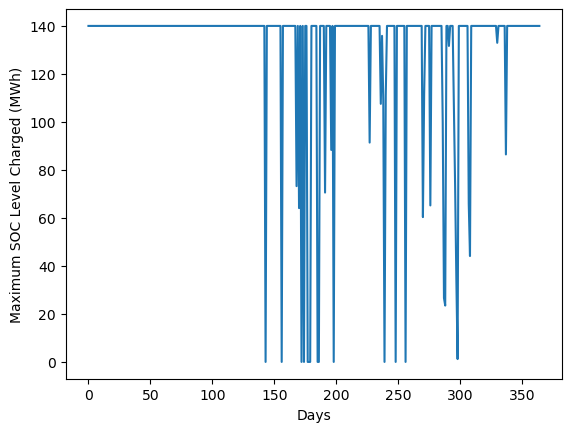

In [18]:
df_res_price['SOC Charged'].head(365).plot()
plt.xlabel("Days")
plt.ylabel("Maximum SOC Level Charged (MWh)")
plt.show()

In [19]:
nochargedays = sum(df_res_price['Check'])/num_days
nochargedays

0.026884650317892826

In [20]:
#Calculating Captured Price Annually

a = 2026
t = 0
df_res_cp = pd.DataFrame(np.zeros((batt_lifetime, 6)), columns = ['Avg Market Price', 'PV Capture Price' ,'PV + BESS Capture Price', 'PV Capture Rate','PV + BESS Capture Rate' , 'Year'])

while a < (batt_lifetime +2026):
  
    df_price_short_cp = df_price_used.loc[df_price_used['Year'] == a].copy()
    df_res_price_short = df_res_price.loc[df_res_price['Year'] == a].copy()
    batt_rev =  sum(df_res_price_short['Discharge Price_wt']*df_res_price_short['Disc Volume']) - sum(df_res_price_short['Charge Price_wt']*df_res_price_short['SOC Charged'])
    
    df_res_cp['Year'].iloc[t] = a
    df_res_cp['Avg Market Price'].iloc[t] = df_price_short_cp['Price'].mean()
    df_res_cp['PV Capture Price'].iloc[t] = sum(df_price_short_cp['Price'] * df_price_short_cp['Production (MWh)'])/sum(df_price_short_cp['Production (MWh)'])
    df_res_cp['PV + BESS Capture Price'].iloc[t] = (sum(df_price_short_cp['Price'] * df_price_short_cp['Production (MWh)']) + batt_rev)/sum(df_price_short_cp['Production (MWh)'])
    df_res_cp['PV Capture Rate'].iloc[t] =  df_res_cp['PV Capture Price'].iloc[t] /  df_res_cp['Avg Market Price'].iloc[t]
    df_res_cp['PV + BESS Capture Rate'].iloc[t] = df_res_cp['PV + BESS Capture Price'].iloc[t] / df_res_cp['Avg Market Price'].iloc[t]
    a+=1
    t+=1

In [21]:
df_res_cp

,Avg Market Price,PV Capture Price,PV + BESS Capture Price,PV Capture Rate,PV + BESS Capture Rate,Year
0,82.793442,45.280440,69.395549,0.546909,0.838177,2026.0
1,68.499064,40.316615,60.043801,0.588572,0.876564,2027.0
2,64.364836,37.287349,56.331265,0.579312,0.875187,2028.0
3,58.812280,34.164126,51.871546,0.580901,0.881985,2029.0
4,60.869725,35.869688,53.736921,0.589286,0.882819,2030.0
5,59.331284,35.169819,52.325370,0.592770,0.881919,2031.0
6,61.619935,34.399915,52.787842,0.558260,0.856668,2032.0
7,62.525686,34.410691,53.340974,0.550345,0.853105,2033.0
8,56.872860,32.482155,50.053316,0.571136,0.880091,2034.0
9,59.273139,33.147239,51.891362,0.559229,0.875462,2035.0


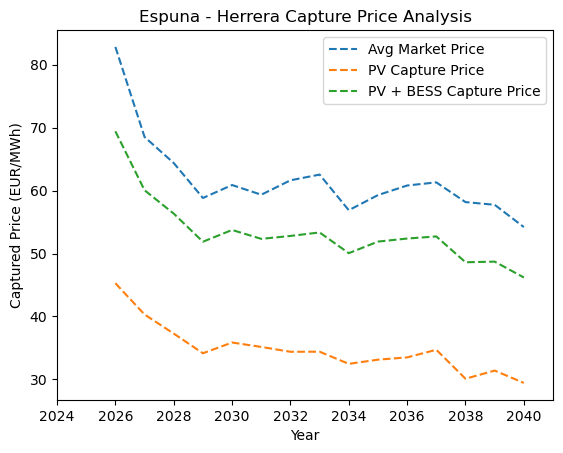

<Figure size 640x480 with 0 Axes>

In [22]:
plot1 = df_res_cp.plot(x= 'Year' , y = ['Avg Market Price', 'PV Capture Price', 'PV + BESS Capture Price'], linestyle = 'dashed')
plot1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.title('Espuna - Herrera Capture Price Analysis')
#plt.axis('tight')
plt.ylabel("Captured Price (EUR/MWh)")
plt.xlim(2024,2041)
plt.show()
plt.savefig('Capture Price')

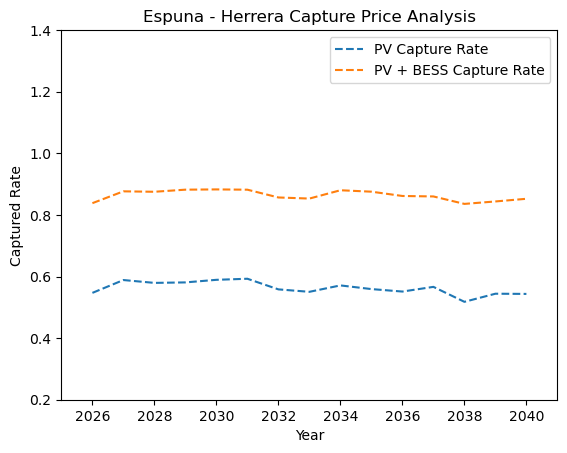

<Figure size 640x480 with 0 Axes>

In [23]:
plot2 = df_res_cp.plot(x= 'Year' , y = ['PV Capture Rate', 'PV + BESS Capture Rate'], linestyle = 'dashed')
plot2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.title('Espuna - Herrera Capture Price Analysis')
plt.ylabel("Captured Rate")
plt.ylim(0.2,1.4);
plt.xlim(2025,2041)
plt.show()
plt.savefig('Capture Rate')

<Axes: >

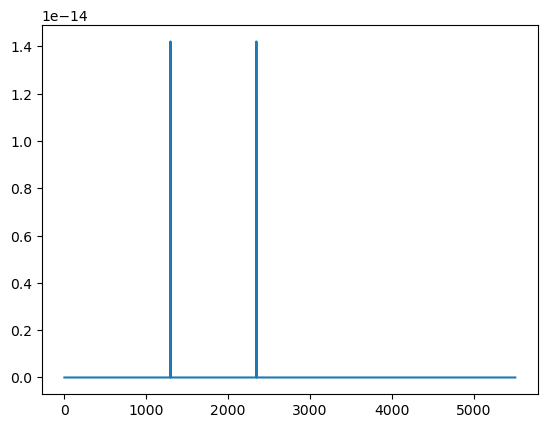

In [24]:
df_res_price_d['End SOC'].plot()

<Axes: >

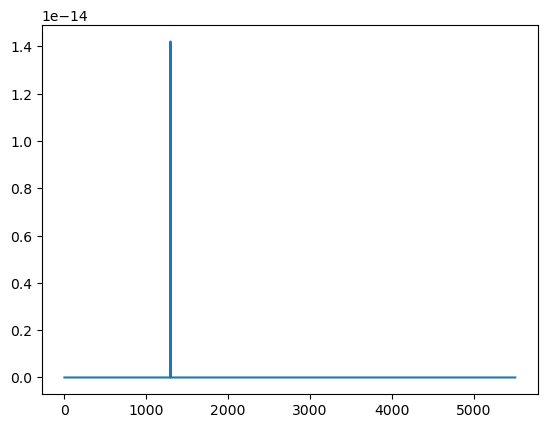

In [25]:
EndSOC_check = df_res_price['SOC Charged'] * round_eff - df_res_price['Disc Volume']
EndSOC_check.plot()

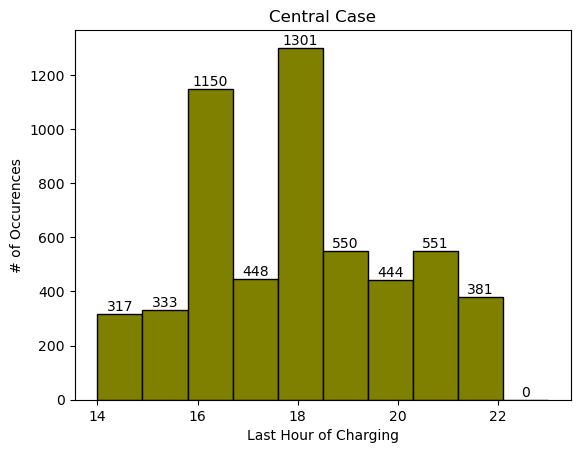

In [26]:
n, bins, patches = plt.hist(df_res_price['Max Hour 24'], range = [14,23], color = 'Olive', ec = 'black')
plt.xlabel('Last Hour of Charging')
plt.ylabel('# of Occurences')
plt.title('Central Case')
plt.grid(False)
plt.bar_label(patches)
plt.show()

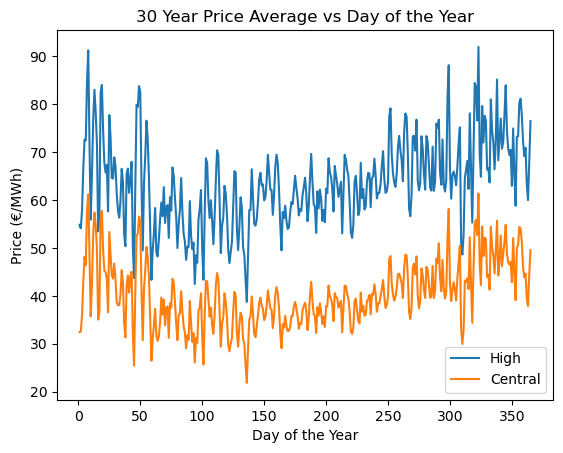

In [27]:
a = df_price_high['Price'].groupby(df_price_high['Day 365']).mean()
b = df_price_cc['Price'].groupby(df_price_cc['Day 365']).mean()

a.plot(label = 'High')
b.plot(label = 'Central')

plt.legend()
plt.xlabel('Day of the Year')
plt.ylabel('Price (€/MWh)')
plt.title('30 Year Price Average vs Day of the Year')
plt.show()


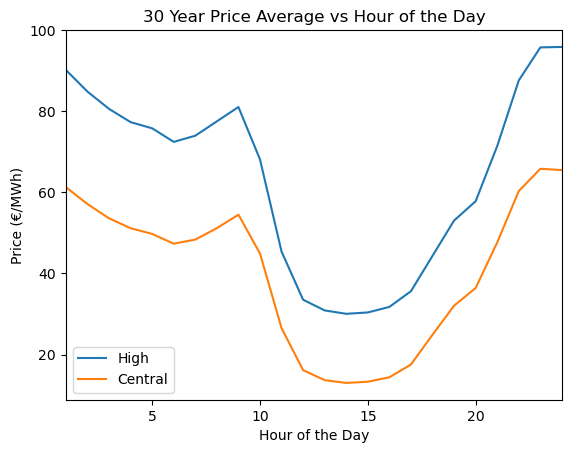

In [28]:
f = df_price_high['Price'].groupby(df_price_high['Hour 24']).mean()
e = df_price_cc['Price'].groupby(df_price_cc['Hour 24']).mean()

f.plot(label = 'High')
e.plot(label = 'Central')

plt.legend()
plt.axis('Tight')
plt.xlim(1,24)
plt.xlabel('Hour of the Day')
plt.ylabel('Price (€/MWh)')
plt.title('30 Year Price Average vs Hour of the Day')
plt.show()

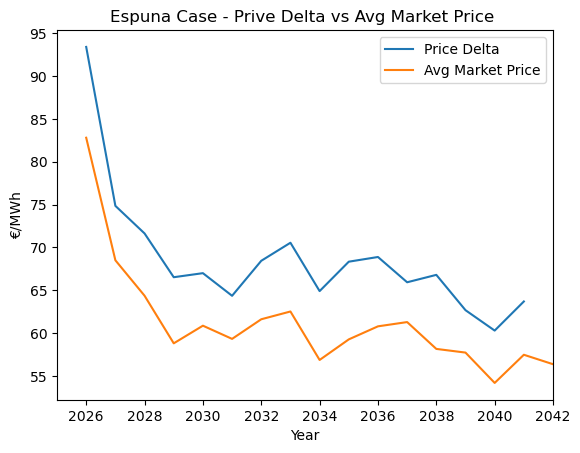

In [29]:
price_delta = df_res_price['Discharge Price_wt'] - df_res_price['Charge Price_wt']
price_delta_plot = price_delta.groupby(df_res_price['Year']).mean().plot(label = 'Price Delta')
df_price_used['Price'].groupby(df_price_used['Year']).mean().plot(label = 'Avg Market Price')
price_delta_plot.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.axis('tight')
plt.title('Espuna Case - Prive Delta vs Avg Market Price ')
plt.xlim(2025, 2042)
plt.legend()
plt.ylabel('€/MWh')
plt.show()

In [37]:
#Calculating Captured Price monthly

b = df_res_price['Month'].min()
bmax = df_res_price['Month'].max()
diff = bmax - b +1
t = 0
df_res_cp_m = pd.DataFrame(np.zeros((int(diff), 8)), columns = ['Avg Market Price', 'PV Capture Price' ,'PV + BESS Capture Price', 'PV Capture Rate','PV + BESS Capture Rate' , 'Month', 'Month 12' ,'Year'])

while b < (bmax+1):
  
    df_price_short_cp = df_price_used.loc[df_price_used['Month Num'] == b].copy()
    df_res_price_short = df_res_price.loc[df_res_price['Month'] == b].copy()
    batt_rev =  sum(df_res_price_short['Discharge Price_wt']*df_res_price_short['Disc Volume']) - sum(df_res_price_short['Charge Price_wt']*df_res_price_short['SOC Charged'])
    
    df_res_cp_m['Month'].iloc[t] = b 
    df_res_cp_m['Month 12'].iloc[t] = df_price_short_cp['Month 12'].min()
    df_res_cp_m['Year'].iloc[t] = df_price_short_cp['Year'].min()
    df_res_cp_m['Avg Market Price'].iloc[t] = df_price_short_cp['Price'].mean()
    df_res_cp_m['PV Capture Price'].iloc[t] = sum(df_price_short_cp['Price'] * df_price_short_cp['Production (MWh)'])/sum(df_price_short_cp['Production (MWh)'])
    df_res_cp_m['PV + BESS Capture Price'].iloc[t] = (sum(df_price_short_cp['Price'] * df_price_short_cp['Production (MWh)']) + batt_rev)/sum(df_price_short_cp['Production (MWh)'])
    df_res_cp_m['PV Capture Rate'].iloc[t] =  df_res_cp_m['PV Capture Price'].iloc[t] /  df_res_cp_m['Avg Market Price'].iloc[t]
    df_res_cp_m['PV + BESS Capture Rate'].iloc[t] = df_res_cp_m['PV + BESS Capture Price'].iloc[t] / df_res_cp_m['Avg Market Price'].iloc[t]
    b+=1
    t+=1

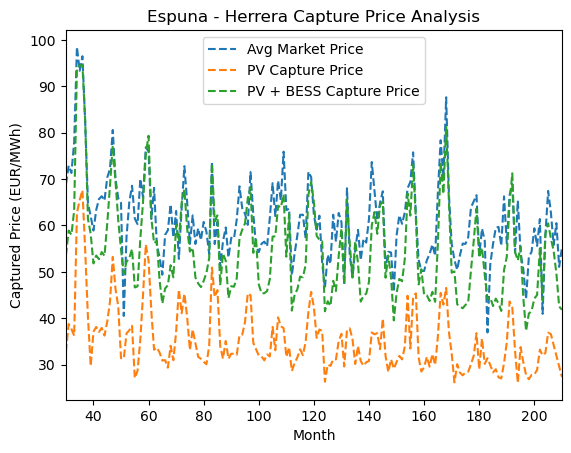

<Figure size 640x480 with 0 Axes>

In [38]:
plot1 = df_res_cp_m.plot(x= 'Month' , y = ['Avg Market Price', 'PV Capture Price', 'PV + BESS Capture Price'], linestyle = 'dashed')
plot1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.title('Espuna - Herrera Capture Price Analysis')
#plt.axis('tight')
plt.ylabel("Captured Price (EUR/MWh)")
plt.xlim(30,210)
plt.show()
plt.savefig('Capture Price')

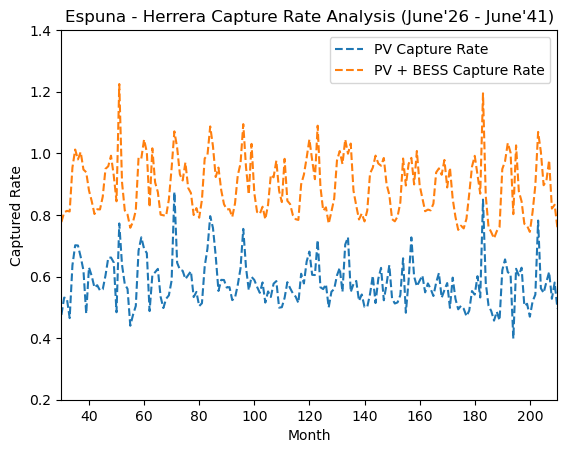

<Figure size 640x480 with 0 Axes>

In [56]:
plot2 = df_res_cp_m.plot(x= 'Month' , y = ['PV Capture Rate', 'PV + BESS Capture Rate'], linestyle = 'dashed')
plot2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.title("Espuna - Herrera Capture Rate Analysis (June'26 - June'41)")
plt.ylabel("Captured Rate")
plt.axis('tight')
plt.ylim(0.2,1.4);
plt.xlim(30,210)
plt.show()
plt.savefig('Capture Rate')

In [40]:
df_res_cp_m.head(25)

,Avg Market Price,PV Capture Price,PV + BESS Capture Price,PV Capture Rate,PV + BESS Capture Rate,Month,Month 12,Year
0,68.875063,32.749454,53.516707,0.475491,0.777011,30.0,6.0,2026.0
1,72.877621,38.743684,58.892900,0.531627,0.808107,31.0,7.0,2026.0
2,71.306922,37.687030,57.982968,0.528519,0.813146,32.0,8.0,2026.0
3,77.917403,36.224598,63.205342,0.464910,0.811184,33.0,9.0,2026.0
4,98.471463,62.645983,93.919674,0.636184,0.953776,34.0,10.0,2026.0
5,93.337431,65.475523,94.491031,0.701493,1.012359,35.0,11.0,2026.0
6,96.462272,67.599818,94.546322,0.700790,0.980138,36.0,12.0,2026.0
7,82.217258,54.572954,82.585291,0.663765,1.004476,37.0,1.0,2027.0
8,64.831488,40.204900,61.418537,0.620145,0.947357,38.0,2.0,2027.0
9,61.957732,29.691197,58.157967,0.479217,0.938672,39.0,3.0,2027.0


In [41]:
delta = df_res_cp_m['PV + BESS Capture Rate'] - df_res_cp_m['PV Capture Rate']

<Axes: >

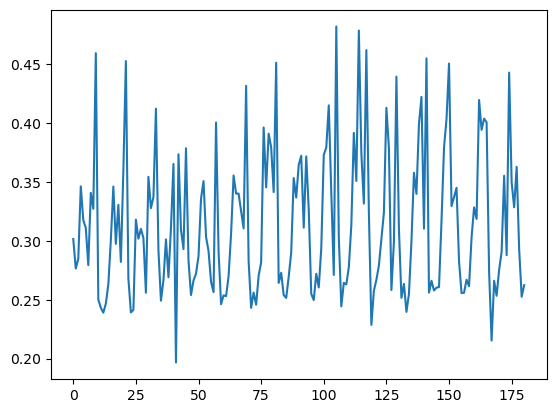

In [42]:
delta.plot()

In [43]:
df_price_short_sort

,S.No,Date,Hour,Day,Price,Year,Hour 24,Day 365,Month Num,Month 12,Production (MWh)
132115,153260,2041-06-30,4340,6386,29.71,2041,21,181,210,6,3.857779
132109,153254,2041-06-30,4334,6386,30.27,2041,15,181,210,6,67.129357
132113,153258,2041-06-30,4338,6386,31.79,2041,19,181,210,6,32.566057
132107,153252,2041-06-30,4332,6386,31.82,2041,13,181,210,6,61.712795
132111,153256,2041-06-30,4336,6386,31.86,2041,17,181,210,6,57.334866
132104,153249,2041-06-30,4329,6386,31.98,2041,10,181,210,6,24.508734
132105,153250,2041-06-30,4330,6386,31.98,2041,11,181,210,6,40.581702
132106,153251,2041-06-30,4331,6386,31.98,2041,12,181,210,6,52.836903
132110,153255,2041-06-30,4335,6386,31.98,2041,16,181,210,6,64.071809
132108,153253,2041-06-30,4333,6386,32.03,2041,14,181,210,6,66.250771


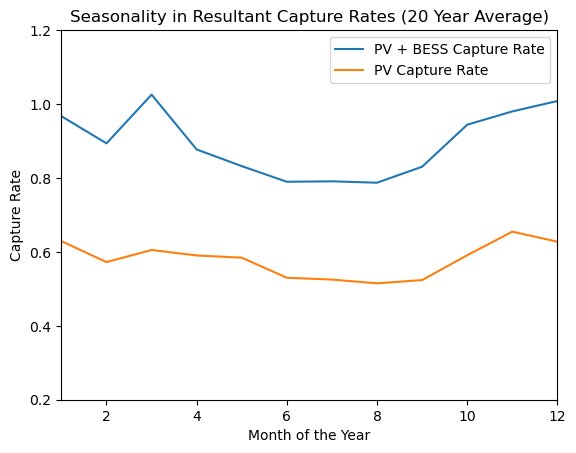

In [58]:
x = df_res_cp_m['PV + BESS Capture Rate'].groupby(df_res_cp_m['Month 12']).mean()
y = df_res_cp_m['PV Capture Rate'].groupby(df_res_cp_m['Month 12']).mean()

x.plot(label = 'PV + BESS Capture Rate')
y.plot(label = 'PV Capture Rate')

plt.legend()
plt.axis('Tight')
plt.xlim(1,12)
plt.ylim(0.2,1.2)
plt.xlabel('Month of the Year')
plt.ylabel('Capture Rate')
plt.title('Seasonality in Resultant Capture Rates (20 Year Average)')
plt.show()